<br>
<img src="TUDelft_logo_cmyk.png" WIDTH=100 ALIGN ="right" hspace="30">
<br>
Assignment 1 of CIEM3220: Base-3 Schematization and Modelling of River Problems

<br>
<br>
<div style="font-size:18pt;text-transform:uppercase;"> 
    <b>Numerical computation of backwater curves</b> </div>
<br>
<br>
<span style="font-size:16pt;color:#00BFFF"> <b> Assignment information </b> </span>
<br>
<br>

**Introduction** 
<br><br>
The assumption of one-dimensional steady-state conditions is widely used in practice to predict the large-scale flow response to interventions in rivers, such as nourishments, dredging, side channels, etc. In steady-state conditions, the Saint Venant equations reduce to the energy equation allowing to derive the Bélanger equation: 
<br><br>
$ \frac{\text{d}d}{\text{d}x} = i_b \frac{d^3-d_e^3}{d^3-d_g^3}$ 
where $i_b= bed slope$, $d_e=$ normal depth, $d_g = $ critical depth.
<br><br>
**Learning outcomes**
<br><br>
1.- The student will have the ability to use numerical methods to solve backwater curves.
<br>
2.- The student will possess the knowledge to assess the precision and reliability of various numerical techniques.
<br>
3.- The student will be capable of forecasting the impact of different river interventions on water levels.
<br><br>
**Instructions** <br><br>
This jupyter notebook contains empty cells with explicit instructions and the expected outcome. Follow these steps and be critical with your results. <br><br>
**Resources**
<br><br>
For background you can consult the lectures on gradually varied flow of the bachelor course 'Fluid Mechanics' (CTB2110) and the lecture on backwater curves (Rivers module B2-1). Regarding the solution of solving Ordinary Differential equations you can consult the material covered in the MUDE (week 1.5). 
<br>
<br>
**Products** <br>
A jupyter notebook containing:<br>
    1) Code <br>
    2) Figures showing the behavior of the numerical solutions and the water-stage variations along the channels <br>
    3) A reflection on the results  <br>
<br>
<br>
**Assessment criteria and feedback** <br>
The assessment is divided in two parts: <br>
 -50% this jupyter notebook: results and answers corresponding to the results and questions posed in the notebook <br>
 -50% oral assessment: discussion on the choices made throughout the assignment, make an appointment via J.A.ArriagaGarcia@tudelft.nl <br>
<br>
**Supervision and help** <br>
Specific questions can be answered via email, J.A.ArriagaGarcia@tudelft.nl <br>
<br>
**Submission and feedback** <br>
The jupyter notebook will be submitted in brightspace before 12pm May 2nd. 
<br>
<br>
**References** <br>
Practical Aspects of Computational River Hydraulics (1980) by J.A. Cunge, F.M. Holly, and A. Verwey. (Chapter 6)

Unsteady Flow in Open Channels (2017) by Jurjen Battjes and Robert Jan Labeur. (Chapter 9)

Open Channel Flow (second edition) by M. Hanif Chaudhry. (Chapter 6)


<br>
<span style="font-size:16pt;color:#00BFFF"> <b> Frame of reference </b> </span>
<br>
<br>

List of symbols
<div style="float: right;"><img style="border:1px solid black;" src="framework.png" HEIGHT= 50% WIDTH=60% ALIGN="right"/><a id='input_file'></a>
$Q [m^3/s]$ discharge <br>
$B [m]$ channel width <br>
$q [m^2/s]=Q/B$ discharge per unit width <br>
$d [m]$ depth <br>
$d_e [m]$ normal flow depth <br>
$d_g [m]$ critical flow depth <br>
$d_N [m]$ boundary depth <br>
$z_b [m]$ bed level <br>
$i_b []$ bed slope <br>





<hr style="height:1px;border:none;color:#333;" />
<h1 style="font-size:16pt;"> <b>Part 1: Backwater computation</b> </h1>
<br>

The Belanger equation:
\begin{equation}
\frac{\text{d}d}{\text{d}x} = i_b \frac{d^3-d_e^3}{d^3-d_g^3} \\
\textrm{where}\:d_e=\left(\frac{c_fq^2}{i_bg}\right)^{1/3} \: \textrm{and} \: d_g=\left(\frac{q^2}{g}\right)^{1/3}
\end{equation}

can predict the type of backwater curve  purely from the boundary depth value with respect to the normal and critical depth. In Part 1, we apply and compare two numerical methods to solve the Belanger equation to the analytical result.


<h1 style="font-size:14pt;"> <b>Forward Euler</b> </h1>

The Belanger equation can be discretized to compute the water levels along a canal/river reach following the Euler method depicted in the following figure.  

<br>
<img src="euler_method.png" WIDTH=300 ALIGN ="center" hspace="-1000">
<br>

The water detph at $i+1$ is computed based on the depth and depth slope at $i$. In equation form it reads as $d_{i+1} = d_i+f(x_i,d_i)\Delta x$, where $f(x_i,d_i) = \frac{\text{d}d}{\text{d}x} = i_b \frac{d^3-d_e^3}{d^3-d_g^3}$. **Note that the increment direction of the index $i$ will depend of where you impose the boundary conditions.**



    

<u>**Forward Euler**</u> <br> <br>

Implement Forward Euler to compute the backwater curve in a function. Consider a river that can be schematized as prismatic where all parameters remain constant besides the depth, the discharge is given in the positive direction and a water depth is imposed at the downstream boundary.
<br>
<br> 

In [58]:
import numpy as np
import matplotlib.pyplot as plt

## Create as many supporting functions as you consider necessary ##
## Forward Euler ##

def equilibrium_depth(cf, q, ib):
    '''
    Compute equilibrium depth
    
    d_e = ((cf*q^2)/(ib*g))^(1/3)
    
    INPUT: cf = dimensionless friction coefficient [-]
           q = flow rate [m^2/s]
           ib = bed slope [-]
    
    OUTPUT: d_e = normal flow depth [m]
    '''
    d_e = (cf*q**2/(ib*g))**(1/3)
    return d_e

def critical_depth(q):
    '''
    Compute critical flow depth
    
    d_g = (q^2/g)^(1/3)
    
    INPUT: q = flow rate [m^2/s]
    
    OUTPUT: d_g = critical flow depth [m]
    '''
    d_g = (q**2/g)**(1/3)
    return d_g

def flow_rate(B, Q):
    '''
    Compute the flow rate given the river discharge and width
    
    q = Q/B
    
    INPUT:  Q = flow discharge [m^3/s]
            B = river width [m]
    
    OUTPUT: q = flow rate [m^2/s]
    '''
    q = Q / B
    return q

def flow_velocity(q, d):
    '''
    Compute the flow velocity given the river flow rate and depth
    
    u = q/d
    
    INPUT:  q = flow rate [m^2/s]
            d = water depth [m]
    
    OUTPUT: u = flow velocity [m/s]
    '''
    u = q / d
    return u

def dd_dx(d, cf, q, ib):
    '''
    Belangér equation
    
    dd/dx = ib*(d^3 - d_e^3)/(d^3 - d_g^3)
    
    INPUT: d = depth [m]
           cf = dimensionless friction coefficient [-]
           q = flow rate [m^2/s]
           ib = bed slope [-]
           
    OUTPUT: dd/dx = depth variation in streamwise direction [m/m]
    '''
    
    de = equilibrium_depth(cf, q, ib)
    dg = critical_depth(q) 
    dd_dx = ib * (d**3 - de**3)/(d**3 - dg**3)
    return dd_dx

def backwater_fwe(cf, q, ib, dx, dBC, N):
    '''
    Backwater curve approximation with Forward Euler method 
    
    dd/dx = ib * (d^3 - d_e^3)/(d^3 - d_g^3)
    |
    |__d(i+1) = d(i) - dx * ib * (d(i)^3 - d_e^3)/(d(i)^3 - d_g^3)
    
    INPUT: cf = dimensionless friction coefficient [-]
           q = flow rate [m^2/s]
           ib = bed slope [-]
           dx = grid spacing [m]
           dBC = depth - boundary condition [m]
           N = number of grid points [-]
    
    OUTPUT: depth = flow depth [m]
    '''
    d_e = equilibrium_depth(cf, q, ib)
    d_g = critical_depth(q)
    depth = np.zeros(N)
    depth[0] = dBC
    for n in range(1,N):
        depth[n] = depth[n-1] - dx * dd_dx(depth[n-1], cf, q, ib)
    return depth

<u>**Improved Euler method**</u> <br> <br>

The improved Euler method also known as Heun's method belongs to the family of predictor-corrector techniques, where the average gradient of the depth slope is used (at $i$ and $i+1$). However, the depth value at $i+1$ is unknown so an estimate of the depth at $i+1$ has to be made, let's name it $d^*_{i+1}$. Then, the depth slope average is used to compute $d_{i+1}$, which reads
<br>
$d_{i+1} = d_i+\frac{f(x_i,d_i)+f(x_{i+1},d^*_{i+1})}{2}\Delta x$. 
<br>
<br>
Create a function to compute the backwater curve using the **improved Euler method**. 
<br>
<br>

In [59]:
## Improved Euler method ##

def bw_fwe_improved(cf, q, ib, dx, dBC, N):
    '''
    Backwater curve approximation with Improved Forward Euler method
    
    dd/dx = ib * (d^3 - d_e^3)/(d^3 - d_g^3)
    |
    |__d_estimate = d(i) - dx * ib * (d(i)^3 - d_e^3)/(d(i)^3 - d_g^3)
    |
    |__d(i+1) = d(i) - dx / 2 * ib * ((d(i)^3 - d_e^3)/(d(i)^3 - d_g^3) + (d_estimate^3 - d_e^3)/(d_estimate^3 - d_g^3))
    
    INPUT: cf = dimensionless friction coefficient [-]
           q = flow rate [m^2/s]
           ib = bed slope [-]
           dx = grid spacing [m]
           dBC = downstream boundary condition -depth [m]
           N = number of grid points [-]
    
    OUTPUT: depth = flow depth [m]
    '''
    d_e = equilibrium_depth(cf, q, ib)
    d_g = critical_depth(q)
    
    depth = np.zeros(N)
    estimate = np.zeros(N)
    depth[0] = dBC
    
    for n in range(1,N):
        estimate = depth[n-1] - dx * dd_dx(depth[n-1], cf, q, ib)
        depth[n] = depth[n-1] - dx / 2 * (dd_dx(depth[n-1], cf, q, ib) + dd_dx(estimate, cf, q, ib))
    return depth

<u>**Analytic solution: Bresse function**</u> <br> <br>

Verify the accuracy of both numerical schemes by comparing the results with the analytic solution for a very wide channel derived by Bresse (1860): <br>
$x = \frac{d}{i_b}-d_e \left( \frac{1}{i_b}-\frac{1}{c_g} \right)\phi+C_1$
, where $\phi=\frac{1}{6}\ln \left[ \frac{w^2+w+1}{(w-1)^2} \right]-\frac{1}{\sqrt{3}}\tan^{-1} \left[ \frac{\sqrt{3}}{2w+1} \right]$ and $w=d/d_e$
<br> 
Note that $C_1$ is a constant that has to be first determined from the downstream boundary condition and that now the values of $x$ are determined from the depth. 

In [60]:
## Bresse function ##

def auxBresse(u):
    Fdu = (1/6) * np.log((u**2+u+1)/(u-1)**2)-(1/3**.5)*np.arctan((3**.5)/(2*u+1))
    return Fdu

def bresse(d, cf, ib, Q, B, dBC, xBC):
    q = Q/B # unit discharge
    de = (cf*q**2/ib/g)**(1/3) # normal depth
    dg = (q**2/g)**(1/3) # critical depth
    
    u = dBC/de
    Fdu = auxBresse(u)
    
    constant = xBC - dBC/ib + de*(1/ib-1/cf)*Fdu
    
    u=d/de
    Fdu = auxBresse(u)
    x = d/ib-de*(1/ib-1/cf)*(Fdu)+constant  
    
    x = np.flip(x)         
    return x

<u>**Testing and Visualization (first part)**</u> <br> <br>
Consider a channel with a rectangular cross-section, width $B=100\:m$, slope of $i_b=0.0004$, a uniform friction coefficient $c_f=0.004$ and a constant discharge $Q=2000\:m^3/s$. The channel flows into a large water reservoir and has at the outflow a water depth of $6\:m$ at $x=10\:km$. 
<br>
<br>
Verify the two numerical schemes using Bresse’s analytic function.  Consider initially a spacing $\Delta x=100\:m$.
<br>
1.- Plot the water depths resulting from the Euler method, Euler improved, and Bresse's function.
<br>
2.- Plot the error along the reach of the Euler method and Euler improved.
<br>
3.- Show the sensitivity to $\Delta x$ of each method by computing the accumulated error $\sum abs(d_{estimated}-d_{bresse})\Delta x$ and plotting it against $N$ in logarithmic scale (both axis). Test $\Delta x$ values of 1, 2, 4, 8, 16, 32, 64, 128, 256 m.  



### 1.1 - Backwater approximations and plots

In [61]:
## -- data -- ##

g = 9.81                                # gravitational acceleration [m/s^2]
B = 100                                 # width  [m]
ib = 0.0004                             # slope [-]
cf = 0.004                              # friction coefficient [-]
Q = 2000                                # discharge [m^3/s]
d_mouth = 6                             # outflow water depth [m]
x_mouth = 10000                         # distance of outfloe [m]

## -- domain and grid -- ##

dx = 100                                # x spacing [m]
 
N1 = int((x_mouth+dx)/ dx)              # number of grid points [-]

l = np.arange(0, x_mouth+dx, dx)        # domain array [m]
l = np.flip(l)                          # flip the domain 

zb1 = np.zeros(N1)                      # bed level elevation

for i in range(N1): 
    zb1[i] = zb1[i-1] + ib*dx

## -- hydraulic variables -- ##

q1 = flow_rate(B, Q)                    # flow rate [m^2/s]
u1_mouth = flow_velocity(q1, d_mouth)   # velocity at river mouth [m/s]

In [62]:
## -- computations -- ## 

d_forward = backwater_fwe(cf, q1, ib, dx, d_mouth, N1)              # depth with Forward Euler method [m]
d_improved = bw_fwe_improved(cf, q1, ib, dx, d_mouth, N1)           # depth with IMproved Forward Euler method [m]
               
x_bresse_fwe = bresse(d_forward, cf, ib, Q, B, d_mouth , x_mouth)   # Bresse function [m]
d_bresse_fwe = np.interp(l, x_bresse_fwe, np.flip(d_forward))       # interpolated depth from Bresse function [m]

Text(0, 0.5, 'Water depth [m]')

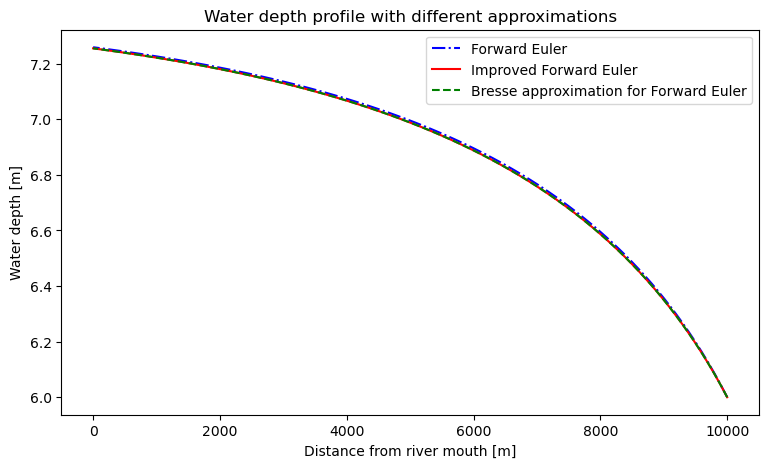

In [63]:
## -- plots -- ##

plt.figure(figsize=(9,5))

plt.plot(l, d_forward, 'b-.', label='Forward Euler')
plt.plot(l, d_improved, 'r', label='Improved Forward Euler')
plt.plot(l, d_bresse_fwe, 'g--', label='Bresse approximation for Forward Euler')

plt.legend()

plt.title('Water depth profile with different approximations')
plt.xlabel('Distance from river mouth [m]')
plt.ylabel('Water depth [m]')

As can be seen from the previous plot, it is quite evident that the Improved Forward Euler method is a better approximation than the Forward Euler method itself.

### 1.2 - Error analysis

In [64]:
## -- computations -- ##

error_forward = d_forward - d_bresse_fwe      # error with Forward Euler [m]
error_improved = d_improved - d_bresse_fwe    # error with Improved Forward Euler [m]

Text(0, 0.5, 'Error [m]')

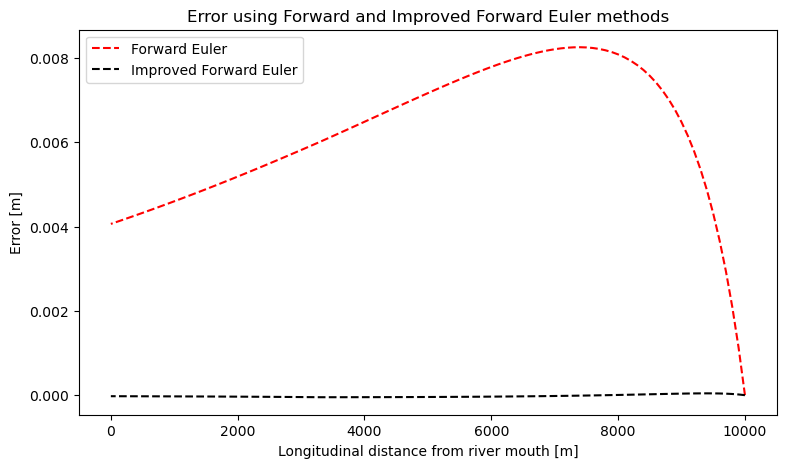

In [65]:
## -- plots -- ##

plt.figure(figsize=(9,5))
plt.plot(l, error_forward, 'r--', label='Forward Euler')
plt.plot(l, error_improved, 'k--', label='Improved Forward Euler')
plt.legend()
plt.title('Error using Forward and Improved Forward Euler methods')
plt.xlabel('Longitudinal distance from river mouth [m]')
plt.ylabel('Error [m]')

Even though the error is quite small for the Forward Euler method, the Improved method shows almost no error with respect to the Bresse's approximation.

### 1.3 - Sensitivity analysis

In [66]:
## -- computations -- ##

dx_test = 2 ** np.arange(9)                                           # dx values [m]

N_test = (x_mouth//(dx_test)) + 1                                     # grid points for each dx

acc_error_forward = np.sum(np.abs(error_forward), axis=0)*dx_test     # accumulated error with Forward Euler method [m]
acc_error_improved = np.sum(np.abs(error_improved),axis=0)*dx_test    # accumulated error with Improved Forward Euler method [m]

Text(0, 0.5, 'Accumulated error [m]')

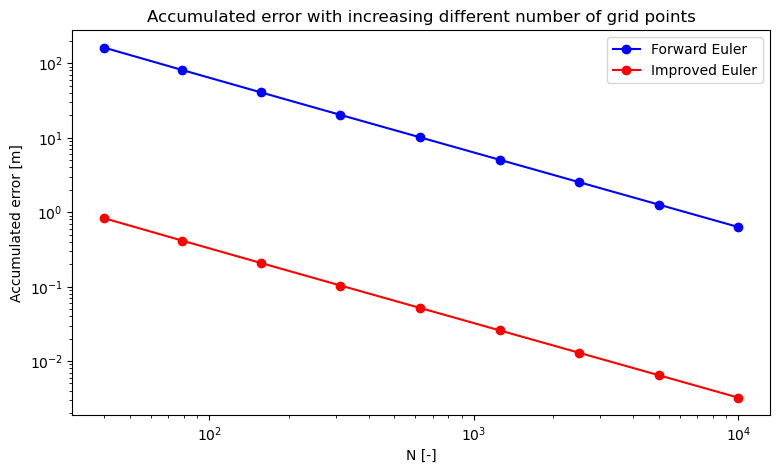

In [67]:
## -- plots -- ##

plt.figure(figsize=(9,5))
plt.plot(N_test, acc_error_forward, 'bo-', label='Forward Euler')
plt.plot(N_test, acc_error_improved, 'ro-', label='Improved Euler')
ypos = np.zeros(len(dx_test))

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.title(f'Accumulated error with increasing different number of grid points')
plt.xlabel(f'N [-]')
plt.ylabel(f'Accumulated error [m]')

As already stated, the Improved method is more accurate than the Forward one. We can see that the accumulated error is almost two orders of magnitude smaller.

<u>Where do you start the computation? Why cannot start in another place?</u> <br>
<p style="color: #00008b"> 
    Computations have to be started from the downstream end of the domain, that is the river mouth (i.e. $x=10000\hspace{1mm}m$) because the given regime is subcritical (as $c_f>i_b$). Therefore, the boundary conditions has to be imposed in this location since in these conditions the information propagates upstream. 
</p>
<br>
<u> **Which method do you prefer and why?** </u> <br>
<p style="color: #00008b"> 
    Forward Euler method is indeed more straightforward, however the Improved Forward Euler is more accurate, as we can see from the accumulated error. I eventually prefer to use this method, as long as computation time can allow to do so. For bigger simulations with larger domains Forward Euler might be preferred, since it is faster even though it is less accurate. In this case we must be aware of the larger inaccuracies related to the use of this method.
</p>
<br>
<u> **What happens if the bed slope is 0? why?** </u> <br>
<p style="color: #00008b"> 
    If $i_b=0$ then $\frac{\text{d}d}{\text{d}x}=0$, that means that depth does not vary along the channel. This is related to a horizontal (H) backwater curve. 
    Moreover, $d_e=(\frac{c_fq^2}{i_bg})^{1/3}\to\infty$. 
</p>

<hr style="height:1px;border:none;color:#333;" />
<h1 style="font-size:16pt;"> <b>Part 2: dredging case </b> </h1>
<br>
In the same river reach a consultancy company proposes to deepen the bed by 0.5 meters between $x=6\:km$ and $x=9\:km$ to improve navigation, the requirement is to increase the water depth by 35 centimeters between kilometers 8 and 9. Use your preferred method to compute the water level profile.

1.- Plot the bed level and surface elevation.
<br>
2.- Plot the difference in surface elevation with respect to the situation without dredging. 
<br>

The intervention cannot reduce the water depth more than 20 centimeters, respect to the original situation, in the rest of the reach. 

3.- Propose a solution to comply with both requirements. 

### 2.1 - Bed level and surface elevation

In [68]:
## -- functions -- ##

def plot(x, z_b, d, d_e):
    '''
    Plot bed level, depth and equilibrium depth for dredging situation
    
    INPUT: x = steramwise direction array [m]
           z_b = bed level [m]
           d = flow depth [m]
           d_e = equilibrium flow depth [m]
           
    OUTPUT: None
    '''
    plt.figure(figsize=(10,7))
    plt.plot(x, z_b, color='darkgoldenrod')
    plt.plot(x, d, 'b')
    plt.plot(x, d_e, 'c')
    plt.xlabel('Distance [m]')
    plt.ylabel('Elevation [m]')
    return None

def grid_points(l, dx):
    '''
    Compute the number of grid points
    
    N = integer(l/dx) + 1
    
    INPUT: l = domain length [m]
           dx = grid spacing [m]
    
    OUTPUT: N = number of grid points
    '''
    N = l//dx + 1
    return N

def f_d_dredging(B, Q, cf, ib, dx, dBC, l, x_mouth, x2, x1, dz):
    '''
    Compute the depth after dredging intervention for the whole river.
    Need to account for backwater effects.
    
    INPUT: B = river width [m]
           Q = river discharge [m^3/s]
           cf = dimensionless friction factor [-]
           ib = bed slope [-]
           dx = grid spacing [m]
           dBC = downstream boundary condition - depth [m]
           l = domain length array [m]
           x_mouth = space coordinate of river mouth [m]
           x2 = coordinate of the end of dredged reach [m]
           x1 = coordinate of the start of dredged reach [m]
           dz = bed level variation due to dredging [m]
    
    OUTPUT: d_dredging = flow depth after dredging intervention [m]
    '''
    
    q = Q/B

    N_d1 = grid_points(x_mouth-x2,dx)                                    # grid points for the reach between 9 and 10 km   
    N_d2 = grid_points(x2-x1,dx)                                         # grid points for the reach between 6 and 9 km   
    N_d3 = grid_points(x1,dx)                                            # grid points for the reach between 0 and 6 km   

    d_r1 = bw_fwe_improved(cf, q, ib, dx, dBC, N_d1)                    # depth for the reach between 9 and 10 km
    d_r2 = bw_fwe_improved(cf, q, ib, dx, d_r1[-1] + dz, N_d2) - dz     # depth for the reach between 6 and 9 km
    d_r3 = bw_fwe_improved(cf, q, ib, dx, d_r2[-1], N_d3)               # depth for the reach between 0 and 6 km 

    d_dredging = np.concatenate([d_r1, d_r2, d_r3])                      # make a single array for the computed depth 
    d_dredging = np.unique(d_dredging) + ib*np.flip(l)  
    
    return d_dredging

def diff_f(d_dredging, zb_dredging, d_approx):
    '''
    Compute the depth variation after dredging intervention
    
    INPUT: d_dredging = flow depth after dredging [m]
           zb_dredging = bed level profile after dredging [m]
           d_approx = flow depth computed with backwater curve approximation 
                      (Forward/Improved Forward Euler method) [m]
           
    OUTPUT: diff = flow depth variation after dredging intervention [m] 
    '''
    diff = (d_dredging - zb_dredging) - d_approx
    return diff

In [69]:
## -- data -- ##

dz = 0.5                                                             # bed level step [m]
x1 = 6000                                                            # initial point [m]
x2 = 9000                                                            # final point [m]

deta = 0.35                                                          # water level increase required [m]
x1_1 = 8000                                                          # initial point of higher water level [m]
x2_1 = x2                                                            # final point of higher water level [m]

zb_dredging = np.zeros(N1)                                           # bed level with dredging [m]

for i in range(N1):
    zb_dredging[i] = ib*dx*i                                         # initial bed level [m]
    if (l[i] < x2 and l[i] > x1).all(): 
        zb_dredging[i] = zb_dredging[i] - dz                         # bed level along the dredged reach [m] 

In [70]:
## -- computations -- ##

de_dredging = equilibrium_depth(cf, q1, ib) + zb_dredging                    # equilibrium surface elevation with dredging [m]
d_dredging = f_d_dredging(B, Q, cf, ib, dx, d_mouth, l, x_mouth, x2, x1, dz) # surface elevation after dredging intervention [m]

Text(9000, 2.5, '')

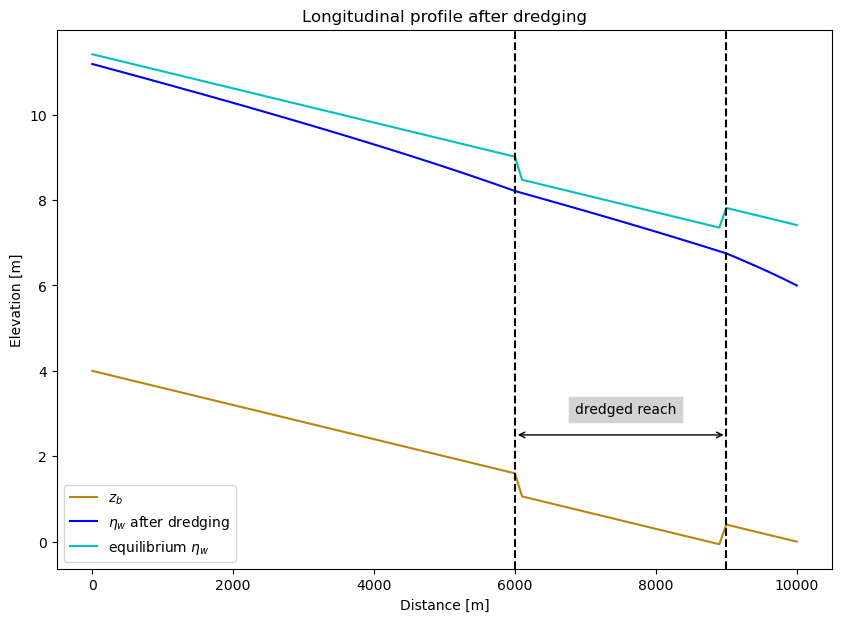

In [71]:
## -- plot -- #

plot(l, zb_dredging, d_dredging, de_dredging)
plt.title('Longitudinal profile after dredging')
plt.legend([f'$z_b$', f'$\eta_w$ after dredging', f'equilibrium $\eta_w$'])
plt.axvline(x1, color='k', ls='--')
plt.axvline(x2, color='k', ls='--')
plt.text((x1+x2)/2-650, 3, 'dredged reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x1, 2.5), xytext=(x2, 2.5),arrowprops=dict(arrowstyle="<->"))

### 2.2 -  Difference in surface elevation with respect to the situation without dredging

In [72]:
## -- computations -- ##

diff = diff_f(d_dredging, zb_dredging, d_improved)        # difference in surface elevation after the intervention [m]
requirement = 0.35                                        # depth increase between 8 and 9 km [m]
min_acc_level = -0.2                                      # max acceptable depth decrease [m]  

Text(0, 0.5, 'Elevation difference $\\Delta h$ [m]')

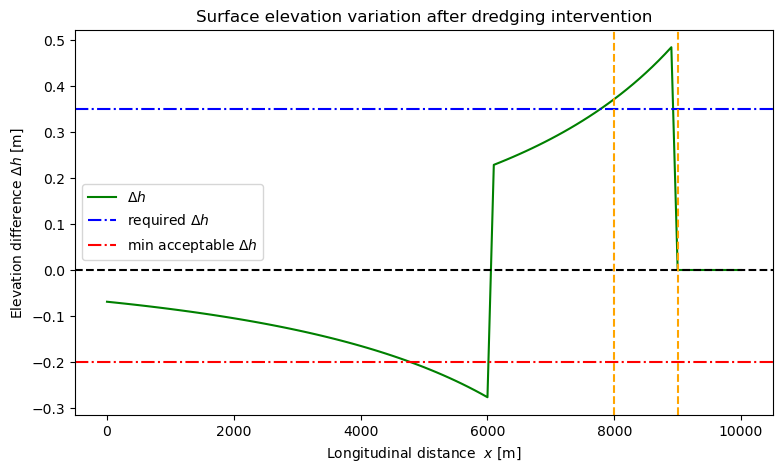

In [73]:
## -- plot -- ##

plt.figure(figsize=(9,5))
plt.plot(l, diff, 'g', label=f'$\Delta h$')
plt.axhline(0, color='k', ls='--')
plt.axhline(requirement, color='b', ls='-.', label=f'required $\Delta h$')
plt.axhline(min_acc_level, color='r', ls='-.', label=f'min acceptable $\Delta h$')
plt.axvline(x1_1, color='orange', ls='--')
plt.axvline(x2_1, color='orange', ls='--')


plt.legend()
plt.title('Surface elevation variation after dredging intervention')
plt.xlabel(f'Longitudinal distance  $x$ [m]')
plt.ylabel(f'Elevation difference $\Delta h$ [m]')

In [74]:
## -- check requirements -- ##

diff_req1 = diff[l > x1_1] 
diff_req2 = diff[l < x2_1]
diff_req = np.intersect1d(diff_req1,diff_req2)                           # depth variation along the reach between 8 and 9 km 

if (diff_req).all() > requirement:
    print(f'Requirement dh > {requirement} m is met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')
else:
    print(f'Requirement dh > {requirement} m is not met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')
    
d_lower = l[diff < min_acc_level]                                        # reach where variation is too large

x_min1 = d_lower[-1]                                                     # upstream cell where variation is too large         
x_min2 = d_lower[0]                                                      # downstream cell where variation is too large

dh_min1 = float(diff[l == x_min1])                                       # depth at upstream cell where variation is too large
dh_min2 = float(diff[l == x_min2])                                       # depth at downstream cell where variation is too large

if diff.any() > min_acc_level:
    print(f'Requirement dh > {min_acc_level} m is not met between x = {x_min1} and x = {x_min2} m\n\
    dh_{x_min1} = {dh_min1:.2f} m\n\
    dh_{x_min2} = {dh_min2:.2f} m')
else:
    print(f'Requirement is met along the whole river\n\
    dh_min = {np.min(diff):.2f} m')

Requirement dh > 0.35 m is met between x = 8000 and x = 9000 m;
    dh_8000 = 0.38 m,
    dh_mean = 0.43 m,
    dh_9000 = 0.48 m

Requirement dh > -0.2 m is not met between x = 4800 and x = 6000 m
    dh_4800 = -0.20 m
    dh_6000 = -0.28 m


### 2.3 - Solution

Dredging a smaller reach can be a solution, as long as backwater effects are large enough in order to comply all requirements.

In [75]:
## -- smaller dredged reach -- ##

x1_d = x1 + 1500                                                           # new initial point of dredging [m]

l_d2 = x2 - x1_d
print(f'New dredged length: {l_d2:.2f} m')

zb_d2 = np.zeros(N1)                                                       # bed level with dredging [m]

for i in range(N1):
    zb_d2[i] = ib*dx*i                                                     # initial bed level [m]
    if (l[i] < x2 and l[i] > x1_d).all(): 
        zb_d2[i] = zb_d2[i] - dz                                           # bed level along the dredged reach [m] 

de_d2 = equilibrium_depth(cf, q1, ib) + zb_d2                              # equilibrium surface elevation with dredging [m]
d_d2 = f_d_dredging(B, Q, cf, ib, dx, d_mouth, l, x_mouth, x2, x1_d, dz)   # surface elevation after dredgin intervention [m]

diff_d2 = diff_f(d_d2, zb_d2, d_improved)                                  # difference in surface elevation [m]

New dredged length: 1500.00 m


Text(9000, 2.5, '')

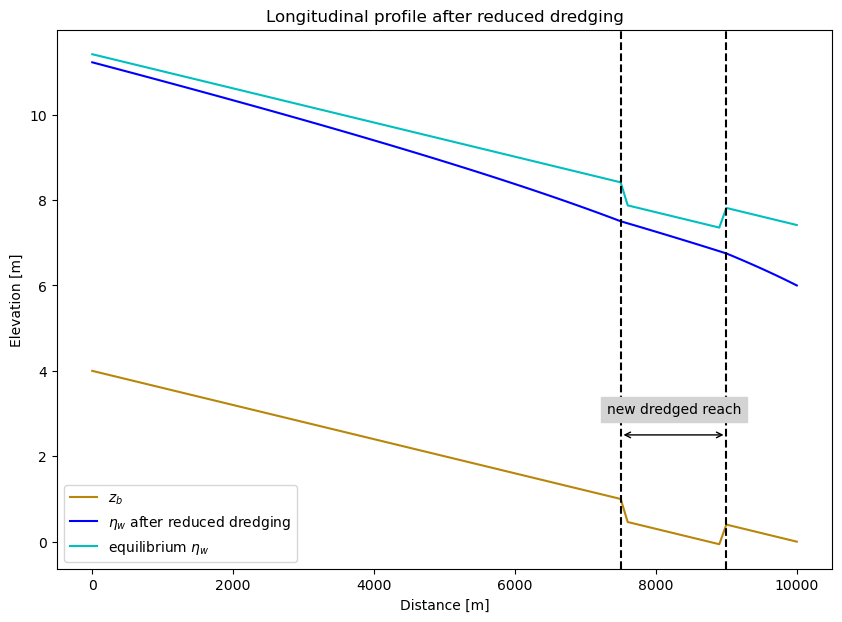

In [76]:
## -- plot -- ##

plot(l, zb_d2, d_d2, de_d2)
plt.title('Longitudinal profile after reduced dredging')
plt.legend([f'$z_b$', f'$\eta_w$ after reduced dredging', f'equilibrium $\eta_w$'])
plt.axvline(x1_d, color='k', ls='--')
plt.axvline(x2, color='k', ls='--')
plt.text((x1_d+x2)/2-950, 3, 'new dredged reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x1_d, 2.5), xytext=(x2, 2.5),arrowprops=dict(arrowstyle="<->"))

Text(0, 0.5, 'Elevation difference $\\Delta h$ [m]')

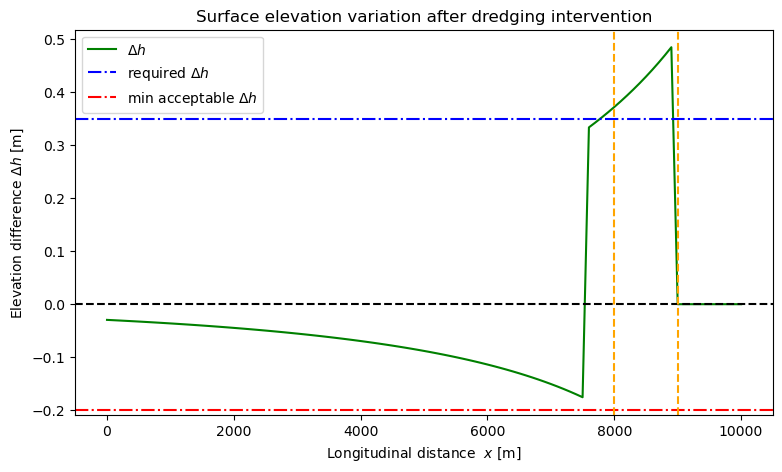

In [77]:
## -- plot -- ##

plt.figure(figsize=(9,5))
plt.plot(l, diff_d2, 'g', label=f'$\Delta h$')
plt.axhline(0, color='k', ls='--')
plt.axhline(requirement, color='b', ls='-.', label=f'required $\Delta h$')
plt.axhline(min_acc_level, color='r', ls='-.', label=f'min acceptable $\Delta h$')
plt.axvline(x1_1, color='orange', ls='--')
plt.axvline(x2_1, color='orange', ls='--')


plt.legend()
plt.title('Surface elevation variation after dredging intervention')
plt.xlabel(f'Longitudinal distance  $x$ [m]')
plt.ylabel(f'Elevation difference $\Delta h$ [m]')

In [78]:
## -- check requirements -- ##

diff_req_d1 = diff_d2[l > x1_1] 
diff_req_d2 = diff_d2[l < x2_1]
diff_req_d = np.intersect1d(diff_req_d1,diff_req_d2)                    # depth variation along the reach between 8 and 9 km 

if (diff_req_d).all() > requirement:
    print(f'Requirement dh > {requirement} m is met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')
else:
    print(f'Requirement dh > {requirement} m is not met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')


if diff_d2.any() < min_acc_level:
    print(f'Requirement dh > {min_acc_level} m is not met between\n\
    d_min = {min(diff_d2):.2f} m')
else:
    print(f'Requirement dh > {min_acc_level} m is met along the whole river\n\
    dh_min = {np.min(diff_d2):.2f} m')

Requirement dh > 0.35 m is met between x = 8000 and x = 9000 m;
    dh_8000 = 0.38 m,
    dh_mean = 0.43 m,
    dh_9000 = 0.48 m

Requirement dh > -0.2 m is met along the whole river
    dh_min = -0.18 m


<u>Where do you start the computation? Why cannot start in another place?</u> <br>
<p style="color: #00008b"> 
    Computations again have to be started downstream, that is at $x=10\hspace{0.5mm}km$ since the boundary condition $d_{mouth}$ is imposed at this point. 
</p>
<br>
<u> **Which method do you prefer and why?** </u> <br>
<p style="color: #00008b"> 
    I decided to use Improved Forward Euler method since it is more accurate. Altough it is, computationally speaking, more time and energy demanding, this fact can be almost neglected in this case since we are dealing with a small domain for which short time computations and simulations are required. Considering the accumulated error for a grid with $\Delta x=100\hspace{0.5mm}$, from $Section 1.3$ we see that the total accumulated error $\epsilon\simeq0.2\hspace{0.5mm}m$, while using the Forward Euler method it would be $\epsilon\simeq10^2\hspace{0.5mm}m$.
</p>
<br>
<u> **Are there other alternatives besides dredging?** </u> <br>
<p style="color: #00008b"> 
    A possible solution should be to narrow the channel width. As example, narrowing the width by a factor of $f_{narrow}=0.9$, that leads to $B=90\hspace{0.5mm}m$ between $x=4800\hspace{0.5mm}m$ $x=7000\hspace{0.5mm}m$ would be sufficient to avoid $\Delta h<-0.20\hspace{0.5mm}m$ and keeping $\Delta h>0.35\hspace{0.5mm}m$ between $x=8000\hspace{0.5mm}m$ and $x=9000\hspace{0.5mm}m$.
    Other possible solutions:
    - (local) narrowing;
    - increased friction through vegetation;
    - increased discharge, but that would mean to make bigger interventions such as locks, weirs or dams in order to regulate the hydrograph (but it also would lead to periods with smaller discharge, hence with a smaller water depth).
</p>

### Alternatives

In the following section the results from local narrowing and incresed friction are shown.

In [79]:
## -- local narrowing -- ##

f_narrow = 0.90                                                                    # narrowing factor
B_narrow = f_narrow*B                                                              # narrowed width

q_narrow = flow_rate(B_narrow, Q)                                                  # flow rate in narrowed reach

x_narrow2 = x_min2 + 1000                                                          # downstream cell of narrowed reach 
x_narrow1 = x_min1                                                                 # upstream cell of narrowed reach

l_1 = x_mouth - x2
N_1 = grid_points(l_1, dx)
d_1 = bw_fwe_improved(cf, q1, ib, dx, d_mouth, N_1)


l_2 = x2-x_narrow2                                                                 # length of dredged reach but not narrowed 
N_2 = grid_points(l_2,dx)                                                          # grid points   
d_2 = bw_fwe_improved(cf, q1, ib, dx, d_1[-1] + dz, N_2) - dz                      # depth 
 
l_narrow1 = x_narrow2 - x1                                                         # length of dredged and narrowed reach
N_narrow1 = grid_points(l_narrow1, dx)                                             # grid points
d_narrow1 = bw_fwe_improved(cf, q_narrow, ib, dx, d_2[-1] + dz, N_narrow1) - dz    # depth

l_narrow2 = x1 - x_narrow1                                                         # length of narrowed but not dredged reach
N_narrow2 = grid_points(l_narrow2, dx)                                             # grid points
d_narrow2 = bw_fwe_improved(cf, q_narrow, ib, dx, d_narrow1[-1], N_narrow2)        # depth

l_3 = x_narrow1                                                                    # length of upstream undisturbed reach
N_3 = grid_points(l_3,dx)                                                          # grid points
d_3 = bw_fwe_improved(cf, q1, ib, dx, d_narrow2[-1], N_3)                          # depth

d_nd = np.concatenate([d_1, d_2, d_narrow1, d_narrow2, d_3])                       # make a single array of depth
d_nd = np.unique(d_nd) + ib*np.flip(l)                                             # remove double values (boundary conditions)

Text(9000, 2.5, '')

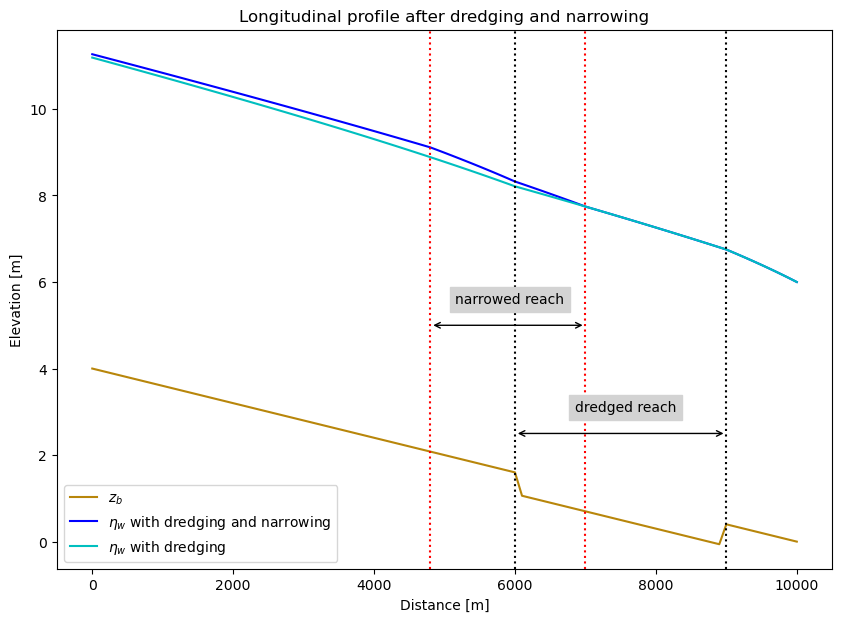

In [80]:
## -- plot -- #

plot(l, zb_dredging, d_nd, d_dredging)
plt.title('Longitudinal profile after dredging and narrowing')
plt.legend([f'$z_b$', f'$\eta_w$ with dredging and narrowing', f'$\eta_w$ with dredging'])

plt.axvline(x_narrow1, color='r', ls=':')
plt.axvline(x_narrow2, color='r', ls=':')

plt.text((x_narrow1+x_narrow2)/2-750, 5.5, 'narrowed reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x_narrow1, 5), xytext=(x_narrow2, 5),arrowprops=dict(arrowstyle="<->"))

plt.axvline(x1, color='k', ls=':')
plt.axvline(x2, color='k', ls=':')

plt.text((x1+x2)/2-650, 3, 'dredged reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x1, 2.5), xytext=(x2, 2.5),arrowprops=dict(arrowstyle="<->"))

In [81]:
## -- computations -- ##

diff_narrow = diff_f(d_nd, zb_dredging, d_improved)      # difference in surface elevation after dredging and narrowing [m]

Text(0, 0.5, 'Elevation difference $\\Delta h$ [m]')

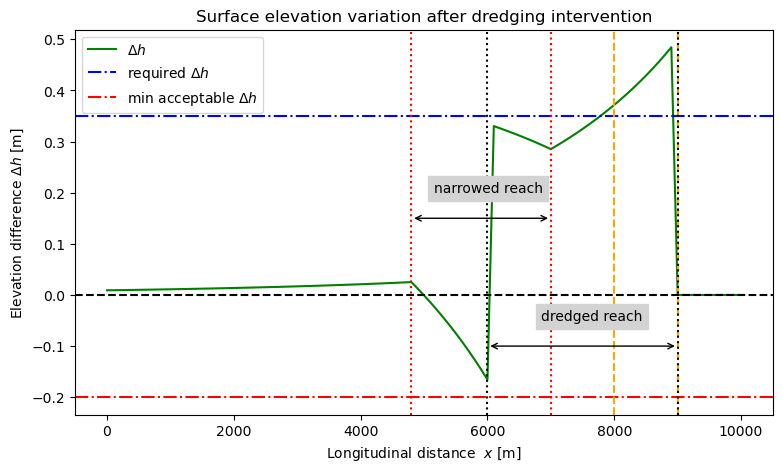

In [82]:
## -- plot -- ##

plt.figure(figsize=(9,5))
plt.plot(l, diff_narrow, 'g', label=f'$\Delta h$')
plt.axhline(0, color='k', ls='--')
plt.axhline(requirement, color='b', ls='-.', label=f'required $\Delta h$')
plt.axhline(min_acc_level, color='r', ls='-.', label=f'min acceptable $\Delta h$')
plt.axvline(x1_1, color='orange', ls='--')
plt.axvline(x2_1, color='orange', ls='--')

plt.axvline(x_narrow1, color='r', ls=':')
plt.axvline(x_narrow2, color='r', ls=':')
plt.text((x_narrow1+x_narrow2)/2-750, 0.2, 'narrowed reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x_narrow1, 0.15), xytext=(x_narrow2, 0.15),arrowprops=dict(arrowstyle="<->"))
plt.axvline(x1, color='k', ls=':')
plt.axvline(x2, color='k', ls=':')
plt.text((x1+x2)/2-650, -0.05, 'dredged reach', backgroundcolor='lightgrey')
plt.annotate('', xy=(x1, -0.1), xytext=(x2, -0.1),arrowprops=dict(arrowstyle="<->"))

plt.legend()
plt.title('Surface elevation variation after dredging intervention')
plt.xlabel(f'Longitudinal distance  $x$ [m]')
plt.ylabel(f'Elevation difference $\Delta h$ [m]')

In [83]:
## -- check requirements -- ##

diff_narrow_req1 = diff_narrow[l > x1_1] 
diff_narrow_req2 = diff_narrow[l < x2_1]
diff_narrow_req = np.intersect1d(diff_narrow_req1,diff_narrow_req2)

if (diff_req).all() > requirement:
    print(f'Requirement dh > {requirement} m is met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')
else:
    print(f'Requirement dh > {requirement} m is not met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_req[0]:.2f} m,\n\
    dh_mean = {diff_req.mean():.2f} m,\n\
    dh_9000 = {diff_req[-1]:.2f} m\n')

if diff_narrow.all() < min_acc_level:
    print(f'Requirement dh > {min_acc_level} m is not met between x = {x_min1} and x = {x_min2} m\n\
    dh_{x_min1} = {dh_min1:.2f} m\n\
    dh_{x_min2} = {dh_min2:.2f} m')
else:
    print(f'Requirement is met along the whole river\n\
    dh_min = {np.min(diff_narrow):.2f} m')

Requirement dh > 0.35 m is met between x = 8000 and x = 9000 m;
    dh_8000 = 0.38 m,
    dh_mean = 0.43 m,
    dh_9000 = 0.48 m

Requirement is met along the whole river
    dh_min = -0.17 m


In [84]:
## -- increased friction along the whole river-- ##

cf2 = 1.65*cf

## -- computations -- ##

de_friction = equilibrium_depth(cf2, q1, ib) + zb1                             # equilibrium surface elevation [m]
d_friction = f_d_dredging(B, Q, cf2, ib, dx, d_mouth, l, x_mouth, 0, 0, 0)     # surface elevation [m]

## -- computations -- ##

diff_frict = diff_f(d_friction, zb1, d_improved)                               # difference in surface elevation [m]

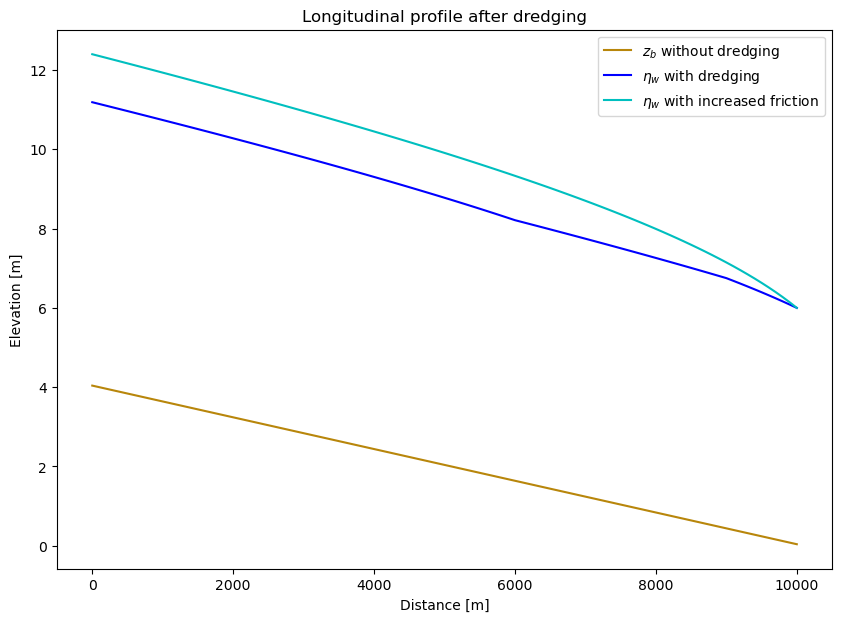

In [85]:
## -- plot -- #

plot(l, zb1, d_dredging, d_friction)
plt.title('Longitudinal profile after dredging')
plt.legend([f'$z_b$ without dredging', f'$\eta_w$ with dredging', f'$\eta_w$ with increased friction'])

Text(0, 0.5, 'Elevation difference $\\Delta h$ [m]')

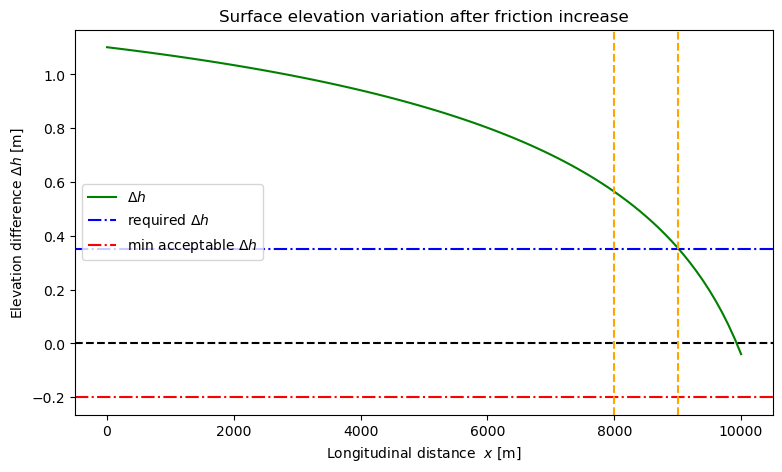

In [86]:
## -- plot -- ##

plt.figure(figsize=(9,5))
plt.plot(l, diff_frict, 'g', label=f'$\Delta h$')
plt.axhline(0, color='k', ls='--')
plt.axhline(requirement, color='b', ls='-.', label=f'required $\Delta h$')
plt.axhline(min_acc_level, color='r', ls='-.', label=f'min acceptable $\Delta h$')
plt.axvline(x1_1, color='orange', ls='--')
plt.axvline(x2_1, color='orange', ls='--')

plt.legend()
plt.title('Surface elevation variation after friction increase')
plt.xlabel(f'Longitudinal distance  $x$ [m]')
plt.ylabel(f'Elevation difference $\Delta h$ [m]')

In [87]:
## -- check requirements -- ##

diff_frict_req1 = diff_frict[l > x1_1] 
diff_frict_req2 = diff_frict[l < x2_1]
diff_frict_req = np.intersect1d(diff_frict_req1,diff_frict_req2)

if (diff_frict).all() > requirement:
    print(f'Requirement dh > {requirement} m is met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_frict[0]:.2f} m,\n\
    dh_mean = {diff_frict_req.mean():.2f} m,\n\
    dh_9000 = {diff_frict_req[-1]:.2f} m\n')
else:
    print(f'Requirement dh > {requirement} m is not met between x = {x1_1} and x = {x2_1} m;\n\
    dh_8000 = {diff_frict_req[0]:.2f} m,\n\
    dh_mean = {diff_frict_req.mean():.2f} m,\n\
    dh_9000 = {diff_frict_req[-1]:.2f} m\n')

if diff_frict.all() < min_acc_level:
    print(f'Requirement dh > {min_acc_level} m is not met between x = {x_min1} and x = {x_min2} m\n\
    dh_{x_min1} = {dh_min1:.2f} m\n\
    dh_{x_min2} = {dh_min2:.2f} m')
else:
    print(f'Requirement dh > {min_acc_level} is met along the whole river\n\
    dh_min = {np.min(diff_narrow):.2f} m')

Requirement dh > 0.35 m is met between x = 8000 and x = 9000 m;
    dh_8000 = -0.04 m,
    dh_mean = 0.47 m,
    dh_9000 = 0.55 m

Requirement dh > -0.2 is met along the whole river
    dh_min = -0.17 m


<hr style="height:1px;border:none;color:#333;" />
<h1 style="font-size:16pt;"> <b>Part 3: river cutoff </b> </h1>
<br>
Villages next to a meandering river present high risk of flooding due to changing weather patterns. An intervention connecting points B and D (dashed line) is proposed to reduce the water level at point C (marked in the figure below). The river has the same parameters as in the previous exercises but it is longer ($L=100\:km$ from A at $x=0$ to E at $x=100\:km$). B is located at $x=25\:km$, C is located at $x=50\:km$ and D is located at $x=75\:km$. At E the river encounters a large lake with a constant water level of 5m. The cutoff is planned in a straight line connecting B and D with a distance of 10km, the cutoff's width is 1/5 of the main channel's width, the bed level slope is constant keeping the original depths at B and D.

<br>
<img src="cutoff.png" WIDTH=300 ALIGN ="center" hspace="-1000">
<br>

1.- Plot the bed level and surface elevation from A to E before the intervention.
<br><br>
Once the cutoff is done part of the discharge flows through the cutoff, reducing the discharge going through the main channel, following $Q=Q_p+Q_c$, where $Q$ is the original discharge, $Q_p$ is the discharge going through the main channel and $Q_c$ is the discharge going through the cutoff. The discharge distribution is unknown a priori.
<br><br>
2.- Using the correct discharge distribution, plot the bed level and surface elevation from A to E after the intervention.
<br><br>
3.- Using the correct discharge distribution, plot the water depth difference with respect to the original situation.
<br><br>



### 3.1 - Situation before the intervention

In [88]:
## -- data -- ## 

x_A = 0                                  # initial point of the domain [m]
x_B = 25000                              # distance of B from A [m]
x_C = 50000                              # distance of C from A [m]
x_D = 75000                              # distance of D from A [m]
x_E = 100000                             # final point of the domain = distance of E from A[m]

d_lake = 5                               # water depth at river mouth [m]

l_c = 10000                              # length of intervention B-D
B_c = B/5                                # width of cutoff channel [m]

x = np.flip(np.arange(0, x_E, dx))       #  grid domain [m]
x_c = np.flip(np.arange(0, l_c, dx))     #  grid domain [m]

N3 = int(x_E/dx)                         # grid points for the main channel [-] 

In [89]:
## -- computations -- ##
 
zb = np.zeros(N3)                                           # bed level [m]  

zb[0] = 0                                                   # assume water level at lake is 0 m above MSL 

for i in range(1,N3):
    zb[i] = zb[i-1] + ib*dx

d_initial = bw_fwe_improved(cf, q1, ib, dx, d_lake, N3)     # initial depth before the intervention [m]
eta_initial = zb + d_initial                                # initial surface elevation before the intervention [m]

Text(0, 0.5, 'Elevation [m]')

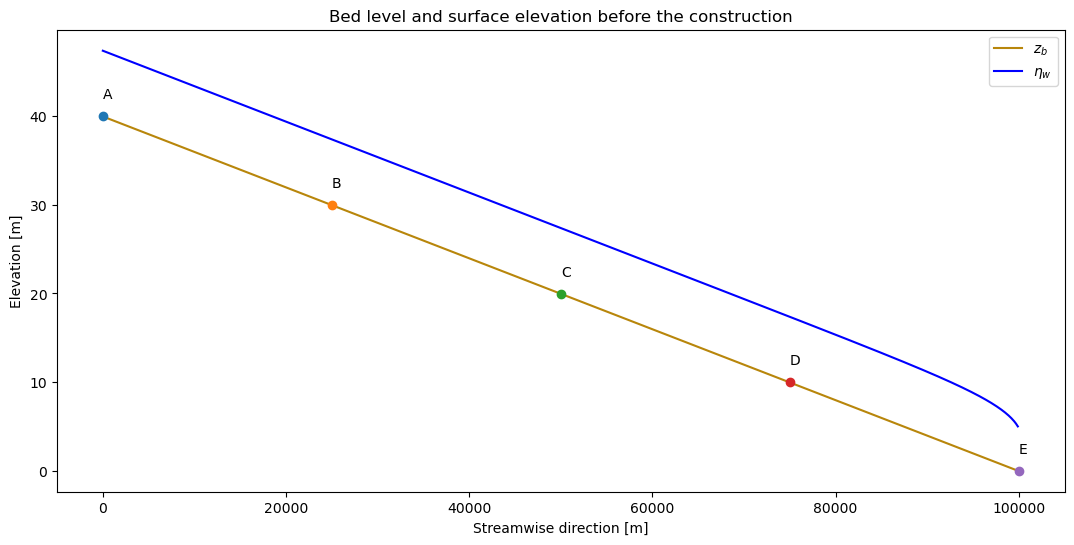

In [90]:
## -- plot -- ##

plt.figure(figsize=(13,6))
plt.plot(x, zb, label=f'$z_b$', color='darkgoldenrod')
plt.plot(x, eta_initial, label=f'$\eta_w$', color='b')

plt.plot(x_A, np.flip(zb)[0], 'o')
plt.text(x_A, np.flip(zb)[0]+2, 'A')

plt.plot(x_B, zb[x == x_E-x_D], 'o')
plt.text(x_B, zb[x == x_E-x_D]+2, 'B')

plt.plot(x_C, zb[x == x_E-x_C], 'o')
plt.text(x_C, zb[x == x_E-x_C]+2, 'C')

plt.plot(x_D, zb[x == x_E-x_B], 'o')
plt.text(x_D, zb[x == x_E-x_B]+2, 'D')

plt.plot(x_E, np.flip(zb)[-1], 'o')
plt.text(x_E, np.flip(zb)[-1]+2, 'E')

plt.legend()
plt.title('Bed level and surface elevation before the construction')
plt.xlabel('Streamwise direction [m]')
plt.ylabel('Elevation [m]')

### 3.2 - Situation after the intervention

Whenever there is a discharge partitioning, the water depth in the bifurcation/confluence point must be the same for the reaches. For this case I assumed that the flow both in the main channel and the cutoff channel is uniform. In this way it is more straightforward to find the discharge distribution between the two channels. 

In fact, the downstream depths of both reaches at D are set equal to the depth of the final undisturbed reach DE in the same location, while for the upstream depths at B the previous assumption allows to equate the uniform flow depths.

Given $d_{e,Bp}=(\frac{c_fq_p^2}{i_bg})^{1/3}$ uniform flow depth in the main channel and $d_{e,Bc}=(\frac{c_fq_c^2}{i_bg})^{1/3}$, it follows that $d_{e,Bp}=d_{e,Bc}$. 

Simplifying this equation we get $f=\frac{Q_p}{Q_c}=\sqrt{\frac{i_{b,p}}{i_{b,c}}}\frac{B_p}{B_c}$, and hence $Q=Q_p+Q_c=fQ_c+Q_c=(1+f)Q_c$.
Therefore, $Q_c=\frac{Q}{1+f}$.

The uniform flow depth assumption has eventually to be checked to determine whether it was reasonable or not.

In [91]:
## -- functions -- ## 

def reach_length(x1, x2):
    '''
    Compute the length of a reach
    
    INPUT: x1 = initial point of the reach [m]
           x2 = final point of the reach [m]
           
    OUTPUT: l = x2 - x1 [m]
    '''
    l = x2 - x1
    return l

def depth_reach(l, dx, cf, q, ib, dBC):
    '''
    Compute the depth over a reach given the length
    
    INPUT: l = reach domain length [m]
           dx = grid spacing [m]
           cf = dimensionless friction factor [-]
           q = flow rate [m^2/s]
           ib = bed slope [-]
           dBC = downstream boundary condition - depth [m]
           
    OUTPUT: depth = flow depth along the reach [m]
    '''
    N = grid_points(l, dx)
    depth = bw_fwe_improved(cf, q, ib, dx, dBC, N) 
    return depth

def discharge(ib, cf, d, B):
    '''
    Compute river discharge given geometrical parameters and friction
    
    Q = (ib*g/cf)^(1/2)*d^(3/2)*B
    
    INPUT: ib = bed slope [-]
           cf = dimensionless friction factor [-]
           d = flow depth [m]
           B = river width [m]
           
    OUTPUT: Q = river discharge [m^3/s]
    '''
    
    Q = np.sqrt(ib*g/cf)*d**(3/2)*B
    return Q

In [92]:
## -- computations -- ##
## -- main assumptions --> uniform flow in B both for main and cutoff channel -- ##
## --                  --> depth in B and D has to be the same both for main and cutoff channel -- ##

ib_c = (zb[x==x_B] - zb[x==x_D])/l_c

Qp_Qc = np.sqrt(ib/ib_c)*(B/B_c)

Q_c = Q / (1 + Qp_Qc)
Q_p = Qp_Qc * Q_c

q_c = flow_rate(B_c, Q_c)
q_p = flow_rate(B, Q_p)

N_c = grid_points(l_c, dx) 
zb_c = np.zeros(N_c)                                                         # bed level [m]  

zb_c[0] = zb[x==x_D]   

for i in range(1, N_c):
    zb_c[i] = zb_c[i-1] + ib_c*dx

l_DE = reach_length(x_D, x_E)                                                # length of reach DE [m]
l_BCD = reach_length(x_B, x_D)                                               # length of reach BC [m]
l_AB = reach_length(x_A, x_B)                                                # length of reach AB [m]

d_DE = depth_reach(l_DE, dx, cf, q1, ib, d_lake)                             # flow depth along reach DE [m]

d_BCD = np.delete(depth_reach(l_BCD, dx, cf, q_p, ib, d_DE[-1]), 0)          # flow depth along reach BCD [m]

d_c = depth_reach(l_c, dx, cf, q_c, ib_c, d_DE[-1])                          # flow depth along cutoff channel [m]

d_AB = np.delete(depth_reach(l_AB, dx, cf, q1, ib, d_BCD[-1]), (0,-1))       # flow depth along reach BCD [m]

d_main = np.concatenate([d_DE, d_BCD, d_AB])                                 # depth along the main channel [m]
eta_main = d_main + zb                                                       # surface elevation along the main channel [m]

eta_c = d_c + zb_c                                                           # surface elevation along the cutoff channel [m]

In [93]:
## -- check uniform flow depth assumptions -- ## 

if np.abs(d_BCD[-1]-d_c[-1]) < 10e-5:
    print(f'Uniform flow depth assumption checked.\n d_B = {d_BCD[-1]:.3f} m\n')
    print(f'Discharge partitioning:\n\
    Q_p = {float(Q_p):.3f} m^3/s\n\
    Q_c = {float(Q_c):.3f} m^3/s\n\
    ratio Q_p/Q = {float(Q_p/Q):.2f}\n\
    ratio Q_c/Q = {float(Q_c/Q):.2f}')
else: 
    print(f'Uniform flow depth assumption not checked.\n\
    d_main = {d_BCD[-1]:.3f} m\n\
    d_cutoff = {d_c[-1]:.3f} m\n')

Uniform flow depth assumption checked.
 d_B = 5.796 m

Discharge partitioning:
    Q_p = 1381.966 m^3/s
    Q_c = 618.034 m^3/s
    ratio Q_p/Q = 0.69
    ratio Q_c/Q = 0.31


Text(0, 0.5, 'Elevation [m]')

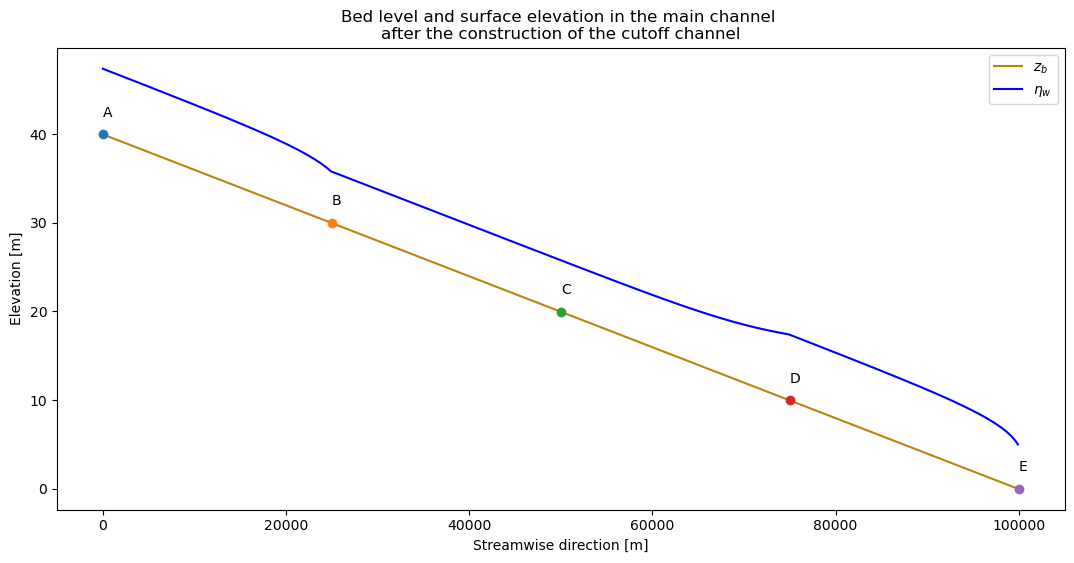

In [94]:
## -- plot -- ##
## -- main channel -- ##

plt.figure(figsize=(13,6))
plt.plot(x, zb, label=f'$z_b$', color='darkgoldenrod')
plt.plot(x, eta_main, label=f'$\eta_w$', color='b')

plt.plot(x_A, np.flip(zb)[0], 'o')
plt.text(x_A, np.flip(zb)[0]+2, 'A')

plt.plot(x_B, zb[x == x_E-x_D], 'o')
plt.text(x_B, zb[x == x_E-x_D]+2, 'B')

plt.plot(x_C, zb[x == x_E-x_C], 'o')
plt.text(x_C, zb[x == x_E-x_C]+2, 'C')

plt.plot(x_D, zb[x == x_E-x_B], 'o')
plt.text(x_D, zb[x == x_E-x_B]+2, 'D')

plt.plot(x_E, np.flip(zb)[-1], 'o')
plt.text(x_E, np.flip(zb)[-1]+2, 'E')

plt.legend()
plt.title(f'Bed level and surface elevation in the main channel \nafter the construction of the cutoff channel')
plt.xlabel('Streamwise direction [m]')
plt.ylabel('Elevation [m]')

Text(0, 0.5, 'Elevation [m]')

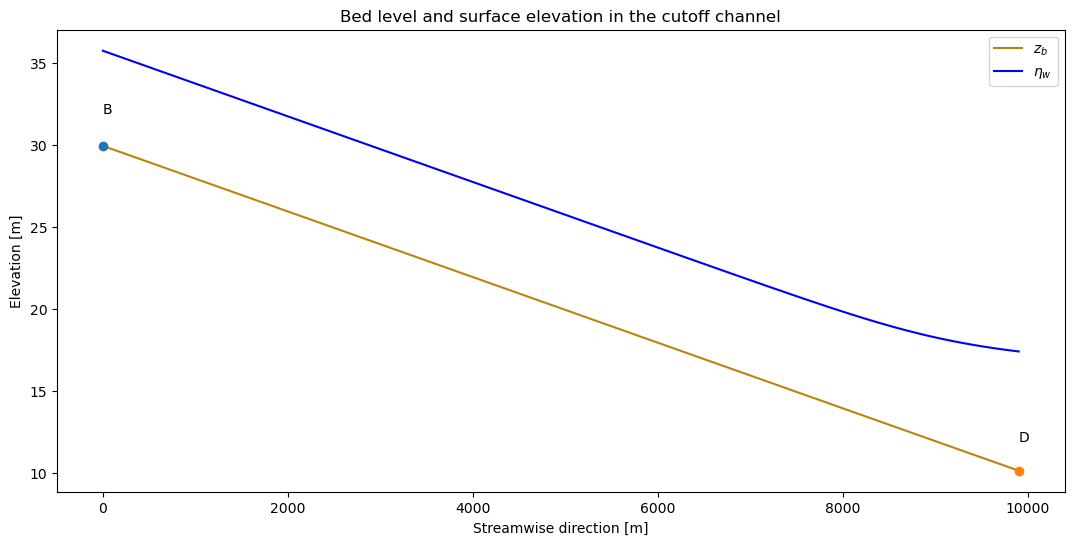

In [95]:
## -- plot -- ##
## -- cutoff channel -- ##

plt.figure(figsize=(13,6))
plt.plot(x_c, zb_c[1:], label=f'$z_b$', color='darkgoldenrod')
plt.plot(x_c, eta_c[1:], label=f'$\eta_w$', color='b')

plt.plot(0, zb_c[-1], 'o')
plt.text(0, zb_c[-1]+2, 'B')

plt.plot(l_c-dx, zb_c[0]+0.2, 'o')
plt.text(l_c-dx, zb_c[0]+2, 'D')

plt.legend()
plt.title(f'Bed level and surface elevation in the cutoff channel')
plt.xlabel('Streamwise direction [m]')
plt.ylabel('Elevation [m]')

### 3.3 - Water depth difference

In [96]:
## -- computations -- ##

diff_cutoff = d_main - d_initial                       # difference between new and initial depth [m]

Text(0, 0.5, 'Elevation [m]')

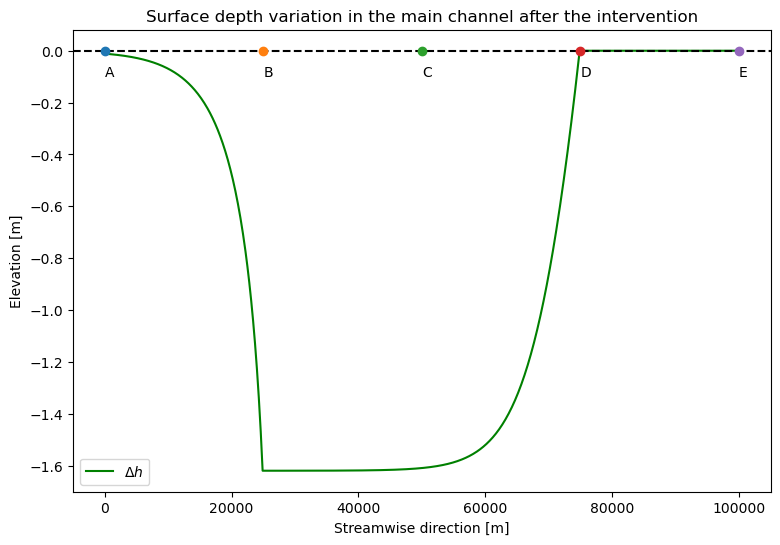

In [97]:
## -- plot -- ##

plt.figure(figsize=(9,6))
plt.plot(x, diff_cutoff, 'g', label=f'$\Delta h$')

plt.axhline(0, color='k', ls='--')

plt.plot(x_A, 0, 'o')
plt.text(x_A, -0.1, 'A')
plt.plot(x_B, 0, 'o')
plt.text(x_B, -0.1, 'B')
plt.plot(x_C, 0, 'o')
plt.text(x_C, -0.1, 'C')
plt.plot(x_D, 0, 'o')
plt.text(x_D, -0.1, 'D')
plt.plot(x_E, 0, 'o')
plt.text(x_E, -0.1, 'E')

plt.legend()
plt.title(f'Surface depth variation in the main channel after the intervention')
plt.xlabel('Streamwise direction [m]')
plt.ylabel('Elevation [m]')

<u>Which principle defines the discharge distribution?</u> <br>
<p style="color: #00008b"> 
    Discharge distribution depends on mass conservation, also known as continuity equation, for which the general form is as follows: $\frac{\partial Bd}{\partial t}+\frac{\partial Q}{\partial x}=0$, that in steady-state condition reduces to. 
</p>

The water depth reduction is larger than expected bringing unexpected ecological problems.<br>
<u>What would you modify in the original intervention to limit the water depth reduction?</u> <br>
<p style="color: #00008b"> 
    Considering only the initial intervention, reduce the cutoff channel width and/or slope, making it not straight but with some bends would deminish the conveyance capacity of the cutoff channel and in this way the main channel would have a larger share of the total discharge. Therefore, the depth reduction in the main channel would decrease with respect to the previous situation. Increasing the friction in the cutoff channel through vegetation growth would also have a similar effect, reducing the discharge in the cutoff channel. 
</p>